# Esperienza 6

In [1]:
%run 'Base_Load.ipynb'

In [2]:
def fluke_sd(x):
    if(isinstance(x, int)): 
        s = str(x)
        ret = 1
    else:
        s = str(x)
        for k in range(len(s)):
            if (s[k] == '.'):
                a = k
        ret = 2*10**(-len(s[a+1:]))
    sd= 0.5/100*x + ret
    return (sd)


def multi_fluke_sd(x): # BISOGNA DARE UNA LISTA, NON UN ARRAY
    sd = []
    for i in range(len(x)):
        ret = fluke_sd(x[i])
        sd.append(ret)
    sd = array(sd)
    return (sd)

## Commutazione porte logiche TTL

In [3]:
Rpull = 0.997e3
sdRpull = fluke_sd(Rpull)
print("R pullup:",Rpull,"   sd:",sdRpull)

R pullup: 997.0    sd: 5.1850000000000005


### Ciclo 1: 0V -> 5V

29

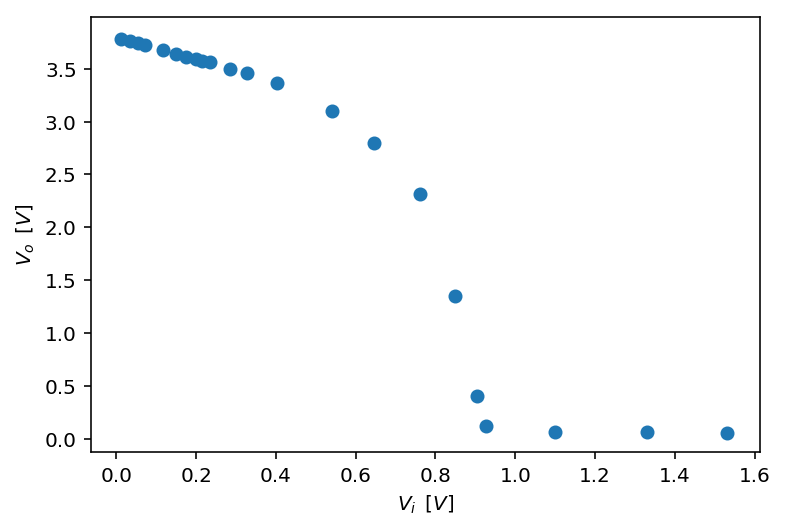

In [29]:
Vi = array([12.30e-3, 33.50e-3, 53.29e-3, 71.24e-3, 116.46e-3, 149.9e-3, 174.75e-3, 198.8e-3, 215e-3, 233.7e-3, 286e-3, 0.328, 0.403, 0.54, 0.647, 0.762, 0.85, 0.903, 0.927, 1.10, 1.33, 1.53, 1.99, 2.36, 2.78, 3.24, 3.58, 3.86, 4.2 ])
Vo = array([3.78, 3.76, 3.74, 3.722, 3.676, 3.643, 3.616, 3.593, 3.577, 3.56, 3.5, 3.46, 3.37, 3.1, 2.8, 2.32, 1.35, 0.4, 122e-3, 59.5e-3, 59.1e-3, 58.8e-3, 58.6e-3, 58.6e-3, 58.6e-3, 58.6e-3, 58.6e-3, 58.6e-3, 58.6e-3])

sdVo = 0.5*Vo/100
sdVi = 0.5*Vi/100

#xscale("log",basex=10)
xlabel("$V_i\,\,\,[V]$")
ylabel("$V_o\,\,\,[V]$") 
errorbar(Vi[:22], Vo[:22], xerr = sdVi[:22], yerr = sdVo[:22], fmt='o')
plt.savefig("andamentoNANDlin.pdf")
len(Vo)

In [8]:
i = len(Vo)-10 #start index for minimal average (0V)
j = 7 #end index for maximum average (5V)

Vup = mean(Vo[:j])
sdVup = std(Vo[:j])

Vdown = mean(Vo[i:])
sdVdown = std(Vo[i:])

print("logic 1:",Vup,"   sd:",sdVup)
print("logic 0:",Vdown,"   sd:",sdVdown)

logic 1: 3.70528571429    sd: 0.0570331088948
logic 0: 0.05876    sd: 0.000290516780927


In [9]:
data = pd.DataFrame(np.column_stack([Vi,Vo]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".3f",".3f"), headers=["$V_{i}$ [V]", "$V_{o}$ [V]"]))

\begin{tabular}{rr}
\hline
   $V_{i}$ [V] &   $V_{o}$ [V] \\
\hline
         0.012 &         3.780 \\
         0.034 &         3.760 \\
         0.053 &         3.740 \\
         0.071 &         3.722 \\
         0.116 &         3.676 \\
         0.150 &         3.643 \\
         0.175 &         3.616 \\
         0.199 &         3.593 \\
         0.215 &         3.577 \\
         0.234 &         3.560 \\
         0.286 &         3.500 \\
         0.328 &         3.460 \\
         0.403 &         3.370 \\
         0.540 &         3.100 \\
         0.647 &         2.800 \\
         0.762 &         2.320 \\
         0.850 &         1.350 \\
         0.903 &         0.400 \\
         0.927 &         0.122 \\
         1.100 &         0.059 \\
         1.330 &         0.059 \\
         1.530 &         0.059 \\
         1.990 &         0.059 \\
         2.360 &         0.059 \\
         2.780 &         0.059 \\
         3.240 &         0.059 \\
         3.580 &         0.059 \\
         3.860

### Isteresi

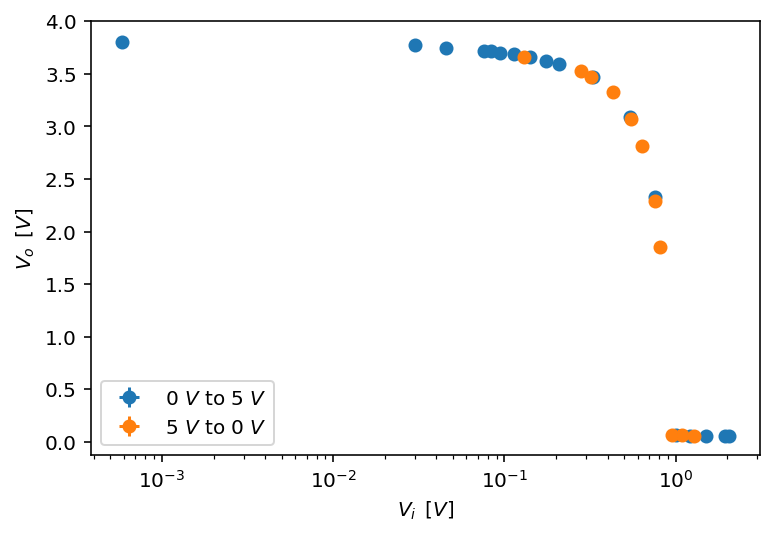

In [25]:
Vi = array([0.58e-3, 29.84e-3, 45.42e-3, 76.24e-3, 83e-3, 94e-3, 113.69e-3, 141e-3, 174e-3, 208.85e-3, 0.327, 0.544, 0.76,  1, 1.21, 1.51, 2.063, 1.93, 1.493, 1.275, 1.092, 0.954, 0.81, 0.76, 0.64, 0.55, 0.43, 0.32, 0.28, 0.13])
Vo = array([3.80, 3.77, 3.75, 3.72, 3.72, 3.70, 3.69, 3.66, 3.625, 3.59, 3.47, 3.09, 2.33, 59.9e-3, 59.4e-3, 58.9e-3, 58.7e-3, 58.7e-3, 58.9e-3, 59.3e-3, 59.71e-3, 60.2e-3, 1.85, 2.29, 2.81, 3.07, 3.33, 3.467, 3.53, 3.66])
sdVo = 0.5*Vo/100
sdVi = 0.5*Vi/100


Viup = array([0.58e-3, 29.84e-3, 45.42e-3, 76.24e-3, 83e-3, 94e-3, 113.69e-3, 141e-3, 174e-3, 208.85e-3, 0.327, 0.544, 0.76,  1, 1.21, 1.51, 2.063, 1.93])
Voup = Vo[:len(Viup)]
sdViup = sdVi[:len(Viup)]
sdVoup = sdVo[:len(Viup)]

Vidown = Vi[len(Viup)+1:]
Vodown = Vo[len(Viup)+1:]
sdVidown = sdVi[len(Viup)+1:]
sdVodown = sdVo[len(Viup)+1:]



xscale("log",basex=10)
xlabel("$V_i\,\,\,[V]$")
ylabel("$V_o\,\,\,[V]$") 
errorbar(Viup, Voup, xerr = sdViup, yerr = sdVoup, fmt='o', label = "$0\,\,V$ to $5\,\,V$")
errorbar(Vidown, Vodown, xerr = sdVidown, yerr = sdVodown, fmt='o', label = "$5\,\,V$ to $0\,\,V$")
legend()
plt.savefig("isteresi.pdf")

In [80]:
data = pd.DataFrame(np.column_stack([Vi,Vo]))
print(tabulate(data, tablefmt="latex_raw", showindex = False, floatfmt=(".3f",".3f"), headers=["$V_{i}$ [V]", "$V_{o}$ [V]"]))

\begin{tabular}{rr}
\hline
   $V_{i}$ [V] &   $V_{o}$ [V] \\
\hline
         0.001 &         3.800 \\
         0.030 &         3.770 \\
         0.045 &         3.750 \\
         0.076 &         3.720 \\
         0.083 &         3.720 \\
         0.094 &         3.700 \\
         0.114 &         3.690 \\
         0.141 &         3.660 \\
         0.174 &         3.625 \\
         0.209 &         3.590 \\
         0.327 &         3.470 \\
         0.544 &         3.090 \\
         0.760 &         2.330 \\
         1.000 &         0.060 \\
         1.210 &         0.059 \\
         1.510 &         0.059 \\
         2.063 &         0.059 \\
         1.930 &         0.059 \\
         1.493 &         0.059 \\
         1.275 &         0.059 \\
         1.092 &         0.060 \\
         0.954 &         0.060 \\
         0.810 &         1.850 \\
         0.760 &         2.290 \\
         0.640 &         2.810 \\
         0.550 &         3.070 \\
         0.430 &         3.330 \\
         0.320